In [60]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [61]:
import pandas as pd

# Supondo que consolidado_com_forecast seja seu DataFrame
data = [
    ['portaldevitau-pro', '01/01/2022', 23078.07, 'realizado'],
    ['portaldevitau-pro', '01/02/2022', 26745.49, 'realizado'],
    ['portaldevitau-pro', '01/03/2022', 30896.18, 'realizado'],
    ['portaldevitau-pro', '01/04/2022', 33174.71, 'realizado'],
    ['portaldevitau-pro', '01/05/2022', 33042.19, 'realizado'],
    ['portaldevitau-pro', '01/06/2022', 30673.48, 'realizado'],
    ['portaldevitau-pro', '01/07/2022', 35524.25, 'realizado'],
    ['portaldevitau-pro', '01/08/2022', 27908.47, 'realizado'],
    ['portaldevitau-pro', '01/09/2022', 23666.13, 'realizado'],
    ['portaldevitau-pro', '01/10/2022', 26320.93, 'realizado'],
    ['portaldevitau-pro', '01/11/2022', 24109.25, 'realizado'],
    ['portaldevitau-pro', '01/12/2022', 29935.45, 'realizado'],
    ['portaldevitau-pro', '01/01/2023', 32795.50, 'realizado'],
    ['portaldevitau-pro', '01/02/2023', 28629.42, 'realizado'],
    ['portaldevitau-pro', '01/03/2023', 27179.28, 'realizado'],
    ['portaldevitau-pro', '01/04/2023', 22548.89, 'realizado'],
    ['portaldevitau-pro', '01/05/2023', 18215.99, 'realizado'],
    ['portaldevitau-pro', '01/06/2023', 23096.91, 'realizado'],
    ['portaldevitau-pro', '01/07/2023', 19598.21, 'realizado'],
    ['portaldevitau-pro', '01/08/2023', 15572.22, 'realizado'] 
       ]

df = pd.DataFrame(data, columns=['conta aws', 'data', 'valor', 'classificacao'])

In [62]:
# Convertendo a coluna de data para datetime e extraindo o mês e o ano
df['data'] = pd.to_datetime(df['data'], dayfirst=True)
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month
df

,conta aws,data,valor,classificacao,ano,mes
0,portaldevitau-pro,2022-01-01,23078.07,realizado,2022,1
1,portaldevitau-pro,2022-02-01,26745.49,realizado,2022,2
2,portaldevitau-pro,2022-03-01,30896.18,realizado,2022,3
3,portaldevitau-pro,2022-04-01,33174.71,realizado,2022,4
4,portaldevitau-pro,2022-05-01,33042.19,realizado,2022,5
5,portaldevitau-pro,2022-06-01,30673.48,realizado,2022,6
6,portaldevitau-pro,2022-07-01,35524.25,realizado,2022,7
7,portaldevitau-pro,2022-08-01,27908.47,realizado,2022,8
8,portaldevitau-pro,2022-09-01,23666.13,realizado,2022,9
9,portaldevitau-pro,2022-10-01,26320.93,realizado,2022,10


In [63]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Divisão em treino e teste
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# SARIMA
sarima_model = SARIMAX(train['valor'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Previsões SARIMA
sarima_pred = sarima_fit.get_prediction(start=test.index[0], end=test.index[-1], exog=exog_test)
sarima_pred_mean = sarima_pred.predicted_mean
# Regressão Linear para ajustar aos resíduos
residuals = test['valor'] - sarima_pred_mean

# Preparação de variáveis para Regressão
X = np.column_stack((sarima_pred_mean, exog_test))

# Treinamento da Regressão Linear
reg_model = LinearRegression()
reg_model.fit(X, residuals)

# Previsão dos resíduos
residual_pred = reg_model.predict(X)

# Previsões combinadas
final_predictions = sarima_pred_mean + residual_pred

/home/pimentel/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/home/pimentel/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

/home/pimentel/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



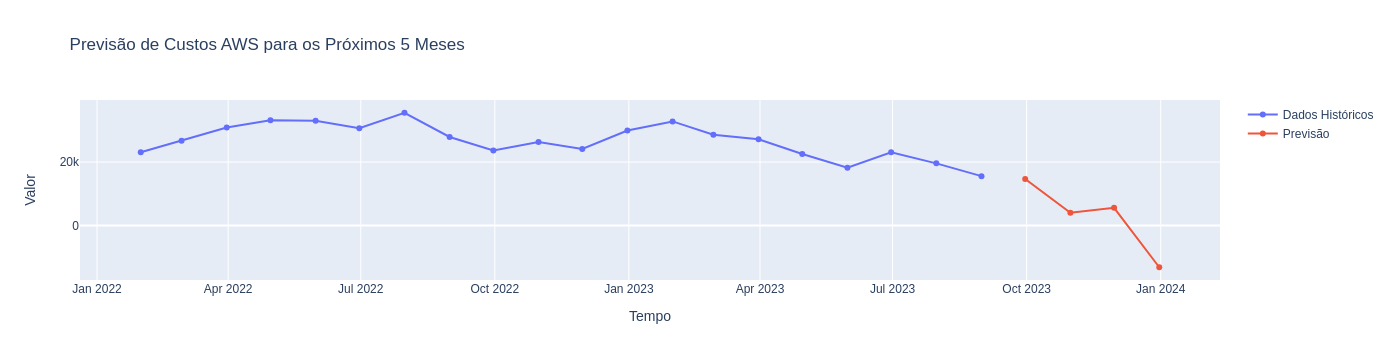

In [64]:
import plotly.graph_objects as go

# Supondo que 'sarima_fit' é o seu modelo SARIMA ajustado
forecast = sarima_fit.get_forecast(steps=12)
mean_forecast = forecast.predicted_mean

# Dados históricos
historical_data = df['valor'].values

# Dados de previsão
forecast_data = mean_forecast.values

# Concatenar dados históricos e de previsão
total_data = np.concatenate([historical_data, forecast_data])

# Criar o eixo de tempo para os dados históricos e previsão
time_historical = pd.date_range(start=df['data'].iloc[0], periods=len(historical_data), freq='M')
time_forecast = pd.date_range(start=time_historical[-1], periods=5, freq='M')[1:]  # Excluindo o último mês histórico
time_total = time_historical.append(time_forecast)

# Criar o gráfico
fig = go.Figure()

# Adicionar dados históricos
fig.add_trace(go.Scatter(x=time_historical, y=historical_data, mode='lines+markers', name='Dados Históricos'))

# Adicionar previsões
fig.add_trace(go.Scatter(x=time_forecast, y=forecast_data, mode='lines+markers', name='Previsão'))

# Layout
fig.update_layout(title='Previsão de Custos AWS para os Próximos 5 Meses',
                  xaxis_title='Tempo',
                  yaxis_title='Valor')

# Mostrar gráfico
fig.show()


In [65]:
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from scipy.stats import shapiro, anderson
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    # Resíduos
    residuals = y_true - y_pred
    
    # Durbin-Watson
    dw = np.sum(np.diff(residuals)**2) / np.sum(residuals**2)
    print(f'Durbin-Watson statistic: {dw}')
    
    # Lagrange Multiplier Test (Breusch-Pagan)
    lm_stats = het_breuschpagan(residuals, np.column_stack([y_pred, y_pred**2]))  # Altere isto conforme suas variáveis exógenas
    print(f"Lagrange multiplier statistic: {lm_stats[0]}")
    print(f"p-value: {lm_stats[1]}")
    print(f"f-value: {lm_stats[2]}")
    print(f"f p-value: {lm_stats[3]}")
    
    # Shapiro-Wilk Test
    shapiro_p_value = shapiro(residuals)[1]
    print(f'Shapiro-Wilk p-value: {shapiro_p_value}')
    
    # Anderson-Darling Test
    ad_statistic = anderson(residuals).statistic
    print(f'Anderson-Darling statistic: {ad_statistic}')
    
    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    print(f'Mean Squared Error: {mse}')
    
    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    print(f'MAE: {mae}')
    
    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f'MAPE: {mape}%')

In [66]:
y_true = test['valor'].to_numpy()
y_pred = final_predictions.to_numpy()

calculate_metrics(y_true, y_pred)

Durbin-Watson statistic: 2.574452616634131
Lagrange multiplier statistic: 1.8562115687009855
p-value: 0.1730626770380675
f-value: 0.8658557633769048
f p-value: 0.5359471078247536
Shapiro-Wilk p-value: 0.20888833701610565
Anderson-Darling statistic: 0.41009489419161227
Mean Squared Error: 5579758.000996625
MAE: 1979.5312396584845
MAPE: 9.994082120678858%


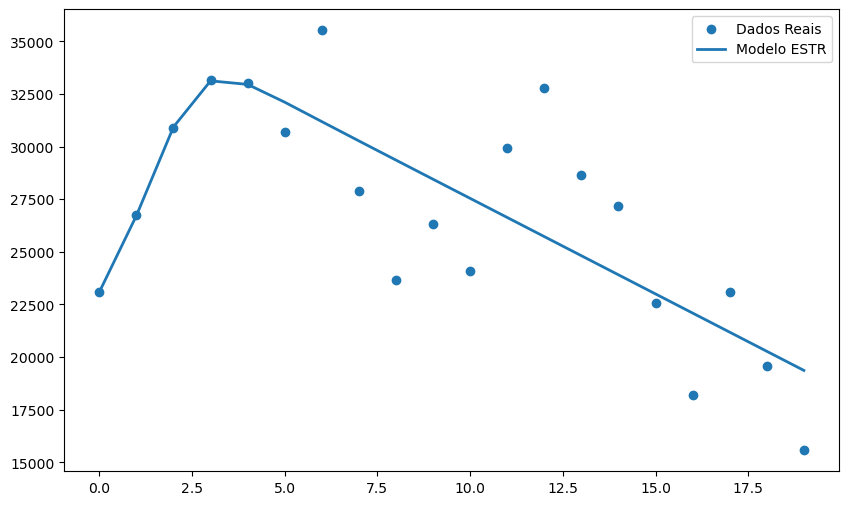

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df['data'] = pd.to_datetime(df['data'])
df.set_index('data', inplace=True)
df.sort_index(inplace=True)
def logistic_transition(x, gamma, c):
    return 1 / (1 + np.exp(-gamma * (x - c)))

def estr_model(x, gamma, c, phi1_0, phi1_1, phi2_0, phi2_1):
    transition = logistic_transition(x, gamma, c)
    return (1 - transition) * (phi1_0 + phi1_1 * x) + transition * (phi2_0 + phi2_1 * x)

x = np.linspace(0, len(df) - 1, len(df))
y = df['valor'].values

# Parâmetros iniciais: gamma, c, phi1_0, phi1_1, phi2_0, phi2_1
initial_params = [1, len(df) // 2, 0, 1, 0, 1]

params, params_covariance = curve_fit(estr_model, x, y, p0=initial_params)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Dados Reais')
plt.plot(x, estr_model(x, *params), label='Modelo ESTR', linewidth=2)
plt.legend()
plt.show()


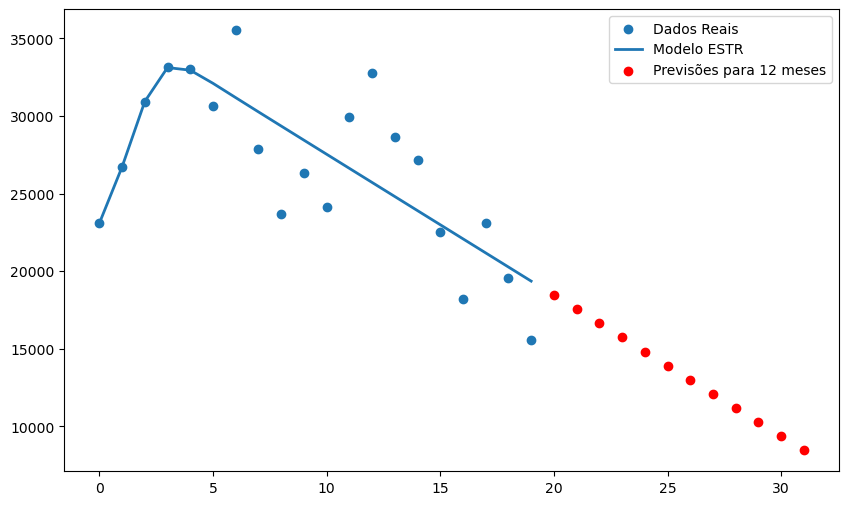

Valores previstos para os próximos 12 meses: [18457.9247297  17549.77193547 16641.61914128 15733.46634709
 14825.3135529  13917.16075871 13009.00796452 12100.85517034
 11192.70237615 10284.54958196  9376.39678777  8468.24399359]


In [68]:
# Estenda o domínio x para os próximos 12 meses
x_future = np.linspace(len(df), len(df) + 11, 12)

# Use a função estr_model para fazer as previsões
y_future = estr_model(x_future, *params)

# Assegure que os valores não sejam negativos
y_future = np.maximum(y_future, 0)

# Plote os dados atuais e as previsões
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Dados Reais')
plt.plot(x, estr_model(x, *params), label='Modelo ESTR', linewidth=2)
plt.scatter(x_future, y_future, label='Previsões para 12 meses', c='red')
plt.legend()
plt.show()

# Exiba os valores previstos para os próximos 12 meses
print("Valores previstos para os próximos 12 meses:", y_future)

In [69]:
y_true = y
y_pred = estr_model(x, *params)

calculate_metrics(y_true, y_pred)


Durbin-Watson statistic: 1.2919641472899832
Lagrange multiplier statistic: 7.938889763577317
p-value: 0.004838351037277375
f-value: 5.92399923984012
f p-value: 0.010549105137098998
Shapiro-Wilk p-value: 0.7353243231773376
Anderson-Darling statistic: 0.32753635131009773
Mean Squared Error: 9753266.523800932
MAE: 2388.330147258705
MAPE: 9.485856419047776%


In [ ]:
# 3. Combinação de Previsões
X_combined = np.column_stack((sarima_pred_mean, estr_pred))
y_true = test['valor'].values  # Valores reais

# Treinando o modelo de regressão linear
reg_model = LinearRegression()
reg_model.fit(X_combined, y_true)

# 4. Previsão Final
final_prediction = reg_model.predict(X_combined)

# Assegurando que os valores previstos não sejam negativos
final_prediction = np.maximum(final_prediction, 0)

In [ ]:
Análise de Fourier para Sazonalidade:

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Primeiramente, crie as previsões SARIMA para os dados de teste
sarima_pred = sarima_fit.get_prediction(start=test.index[0], end=test.index[-1])
sarima_pred_mean = sarima_pred.predicted_mean

# Crie as previsões ESTR para os dados de teste
x_test = np.linspace(len(train), len(df) - 1, len(test))
estr_pred = estr_model(x_test, *params)

# Assegure que os valores não sejam negativos
estr_pred = np.maximum(estr_pred, 0)

# Combine as previsões SARIMA e ESTR para criar um novo conjunto de características
X_combined = np.column_stack((sarima_pred_mean, estr_pred))

# O valor real que você deseja prever
y_true = test['valor'].values

# Treine o modelo de regressão linear para fazer a previsão final usando ambas as previsões
final_model = LinearRegression()
final_model.fit(X_combined, y_true)

# Faça a previsão final
final_prediction = final_model.predict(X_combined)

# Assegure que os valores não sejam negativos
final_prediction = np.maximum(final_prediction, 0)

# Avalie o modelo final usando métricas como o MSE e o MAE
mse = mean_squared_error(y_true, final_prediction)
mae = mean_absolute_error(y_true, final_prediction)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 5632060.140622771
Mean Absolute Error: 2075.7687073875527


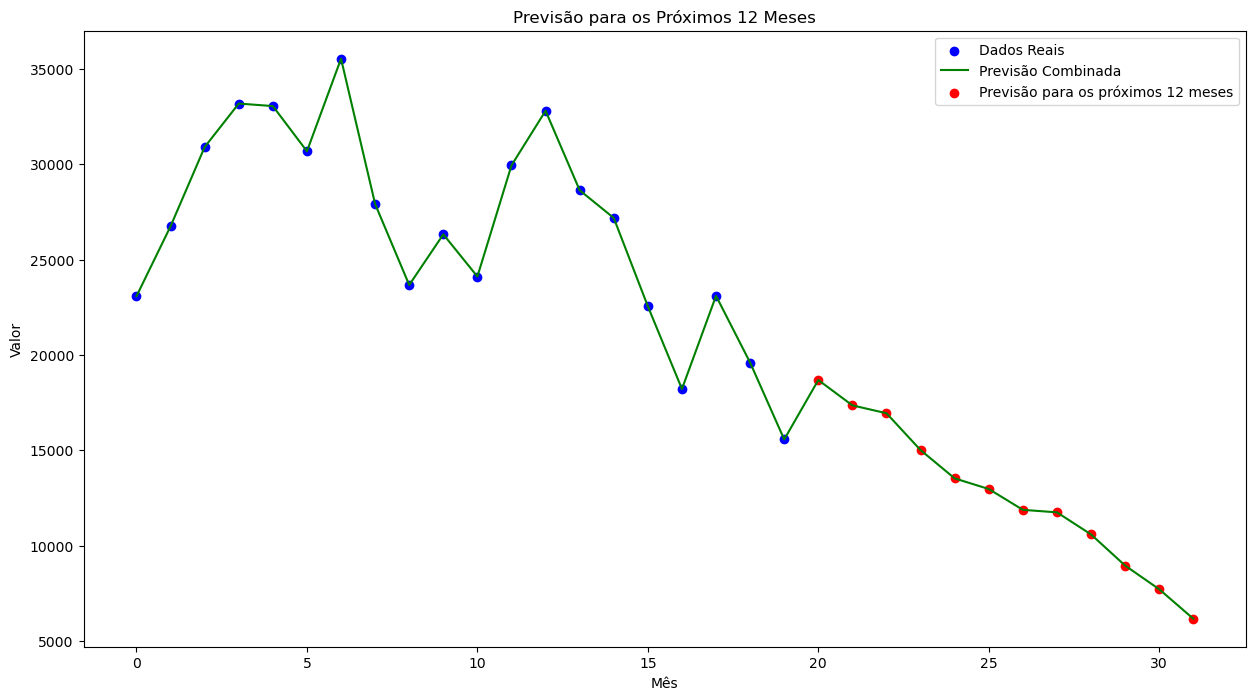

In [71]:
import matplotlib.pyplot as plt

# Estenda o domínio para os próximos 12 meses
future_months = 12
x_sarima_future = np.linspace(len(df), len(df) + future_months - 1, future_months)
x_estr_future = np.linspace(len(df), len(df) + future_months - 1, future_months)

# Gerar previsões SARIMA e ESTR para o futuro
sarima_future = sarima_fit.get_forecast(steps=future_months).predicted_mean
estr_future = estr_model(x_estr_future, *params)

# Assegure que os valores não sejam negativos
estr_future = np.maximum(estr_future, 0)

# Combinar as previsões SARIMA e ESTR
X_future_combined = np.column_stack((sarima_future, estr_future))

# Use o modelo de regressão linear para fazer a previsão final
final_future_prediction = final_model.predict(X_future_combined)

# Assegure que os valores não sejam negativos
final_future_prediction = np.maximum(final_future_prediction, 0)

# Dados originais e previsão para os próximos 12 meses
x_all = np.concatenate([x, x_estr_future])
y_all = np.concatenate([y, final_future_prediction])

# Plot
plt.figure(figsize=(15, 8))
plt.scatter(x, y, label='Dados Reais', c='blue')
plt.plot(x_all, y_all, label='Previsão Combinada', c='green')
plt.scatter(x_estr_future, final_future_prediction, c='red', label='Previsão para os próximos 12 meses')
plt.legend()
plt.title('Previsão para os Próximos 12 Meses')
plt.xlabel('Mês')
plt.ylabel('Valor')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (20,) and (4,)

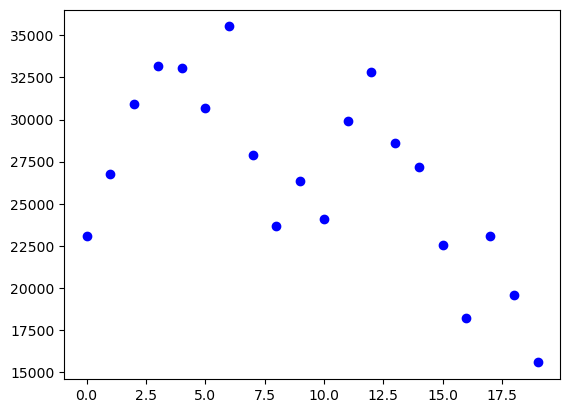

In [72]:
from sklearn.linear_model import LinearRegression

# Intervalo de tempo atual
x_current = np.arange(0, len(df))

# Intervalo de tempo para previsão (próximos 12 meses, por exemplo)
x_future = np.arange(len(df), len(df) + 12)

# Obtenha as previsões ponderadas para os próximos 12 meses (você teria que gerar essas previsões de acordo com seu modelo)

# Ponderação: suponhamos que você queira dar 70% de peso ao SARIMA e 30% ao ESTR
weights = np.array([0.7, 0.3])

# Dados de treino com ponderação
X_weighted = X * weights

# Treinamento da Regressão Linear com ponderação
reg_model_weighted = LinearRegression()
reg_model_weighted.fit(X_weighted, residuals)

# Previsão dos resíduos ponderados
residual_pred_weighted = reg_model_weighted.predict(X_weighted)

# Previsões combinadas ponderadas
final_predictions_weighted = sarima_pred_mean + residual_pred_weighted

final_predictions_future = final_model.predict(X_future_combined)

# Plot dos dados reais
plt.scatter(x_current, df['valor'], label='Dados Reais')

# Plot das previsões ponderadas para o período atual
plt.plot(x_current, final_predictions_weighted, label='Previsões Ponderadas Atuais', color='orange')

# Plot das previsões ponderadas para os próximos 12 meses
plt.plot(x_future, final_predictions_future, label='Previsões Ponderadas Futuras', color='red')

# Configurações do gráfico
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.title('Previsões Ponderadas com SARIMA e ESTR')
plt.legend()

# Mostrar o gráfico
plt.show()
